<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88_%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#시각화
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#가우시안 나이브 베이즈로 iris 데이터 분류
from sklearn.naive_bayes import GaussianNB
#분류 성능 측정
from sklearn import metrics
from sklearn.metrics import accuracy_score

dataset.data -> 입력 특성 데이터(꽃잎 길이, 받침 길이 등)
dataset.target->예측값(품종)

In [2]:
#iris에서 데이터 불러옴
dataset = load_iris()

#pandas의 데이터 프레임으로 데이터 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#레이블(타깃)을 데이터 프레임에 저장
df['target'] = dataset.target

#숫자->문자로 레이블 변경
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
#데이터 확인
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

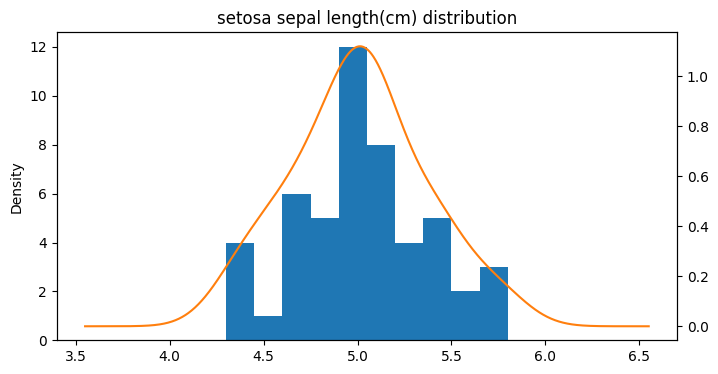

In [3]:
# 종류별 데이터 나누기
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target=="versicolor"]
virginica_df = df[df.target=="virginica"]

#setosa 붗꽃 꽃받침 길이 시각화
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal length(cm) distribution",
                                    figsize=(8,4))

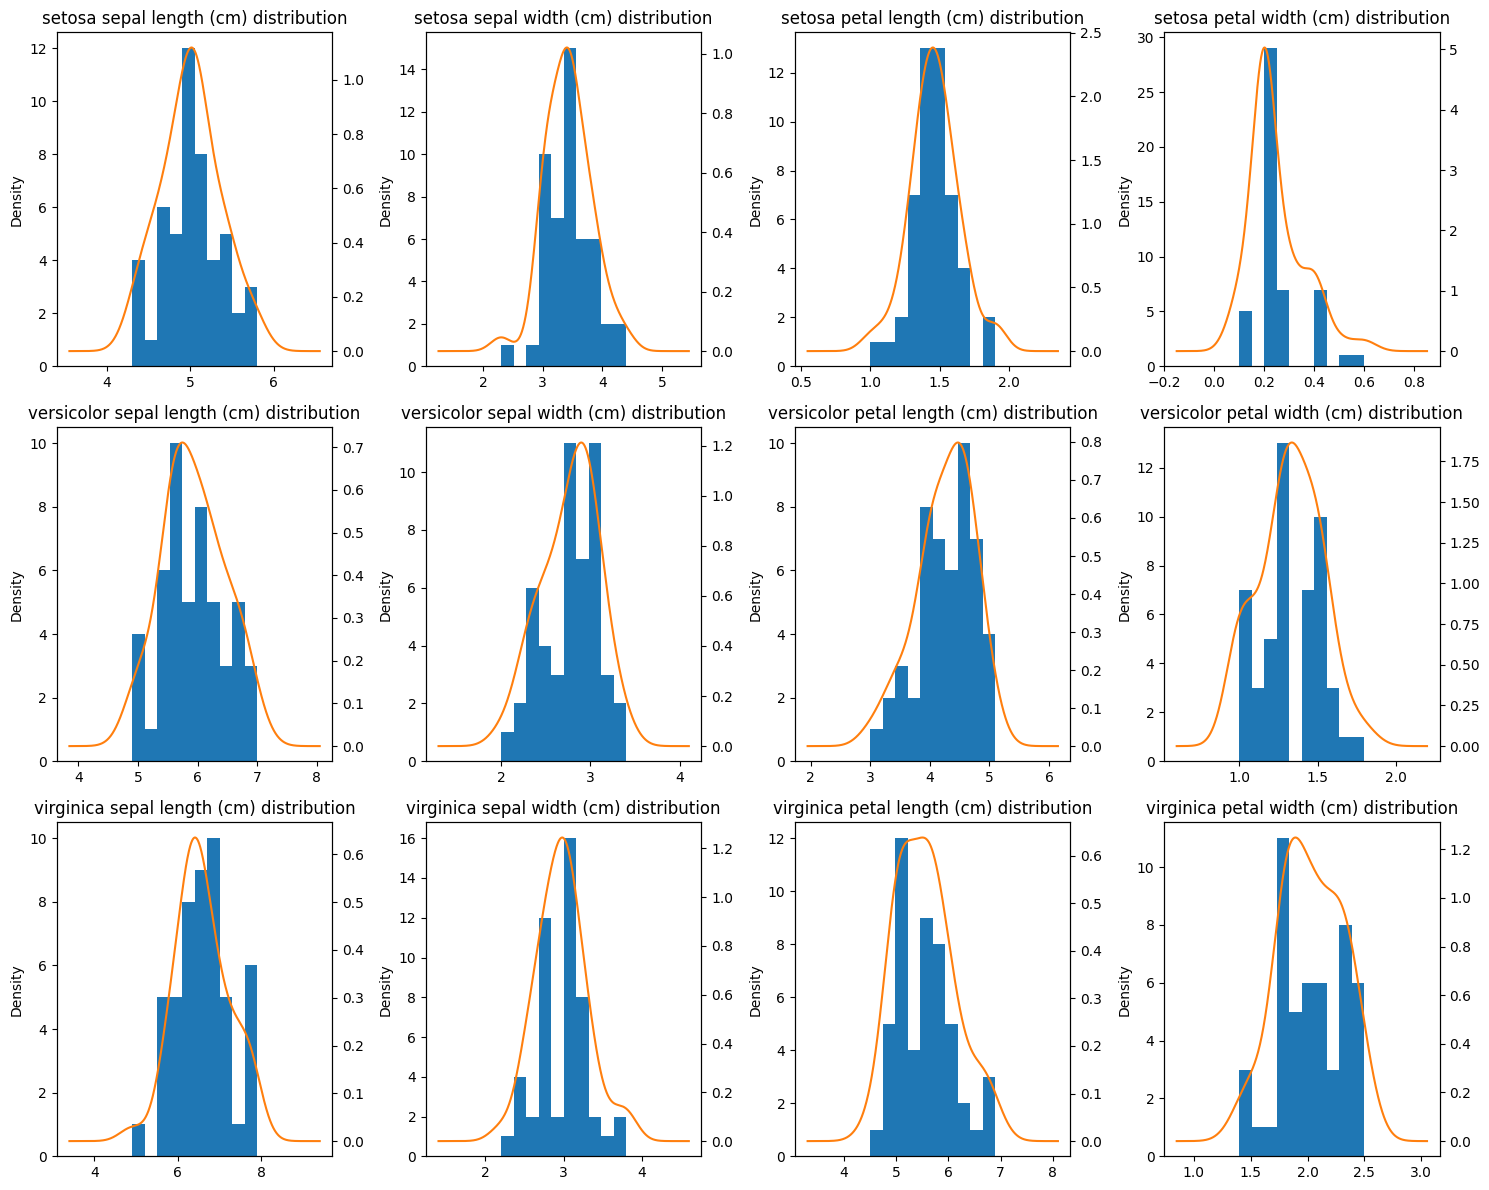

In [5]:
import matplotlib.pyplot as plt

# 그래프 배치를 위한 figure 설정
plt.figure(figsize=(15, 12))

# 각 특성별 반복
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets = ['setosa', 'versicolor', 'virginica']
plot_count = 1

for target in targets:
    target_df = df[df.target == target]

    for feature in features:
        plt.subplot(3, 4, plot_count)
        ax = target_df[feature].plot(kind='hist')
        target_df[feature].plot(kind='kde', ax=ax, secondary_y=True)
        plt.title(f"{target} {feature} distribution")
        plot_count += 1

plt.tight_layout()
plt.show()

In [8]:
#데이터 다듬기
X_train, X_test, y_train, y_test=train_test_split(dataset.data, dataset.target, test_size=0.2)

model = GaussianNB()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [9]:
accuracy_score(y_test, predicted)

0.9333333333333333